In [ ]:
%pip install -r requirements.txt

In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
print(sys.path)

['/home/coberndorm/Documents/Semestre_IX/Artificial_Intelligence/Trabajos/Trabajo_2/Autoencoder', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/coberndorm/Documents/Semestre_IX/Artificial_Intelligence/.venv/lib/python3.10/site-packages', '.', '.', '..']


In [5]:
from MLP.activationFunctions import *
import MLP.MLP as MLP
import MLP.MLP_bias as MLP_bias
import MLP.dataManipulation as dm
import MLP.plottingFunctions as pltf

# Data Exploration

### Dataset 1

In [3]:
import scipy.io
mat = scipy.io.loadmat('../data/datos.mat')

data = np.column_stack([mat["COD1"], mat["t"], mat["Xv1"]])
data = dm.normalize_min_max(data)

# X = [X, OD], Y = [S]
train, _, valid, idx = dm.train_test_val(data, (80,0,20))

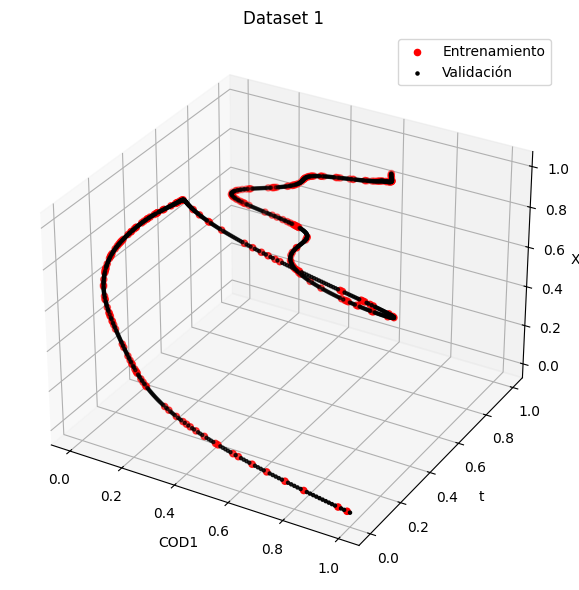

In [4]:
pltf.plot_3d(valid,train, color=['red', 'black'], marker=['o','.'], title="Dataset 1", x_label="COD1", y_label="t", z_label="Xv1", label=["Entrenamiento", "Validación"])

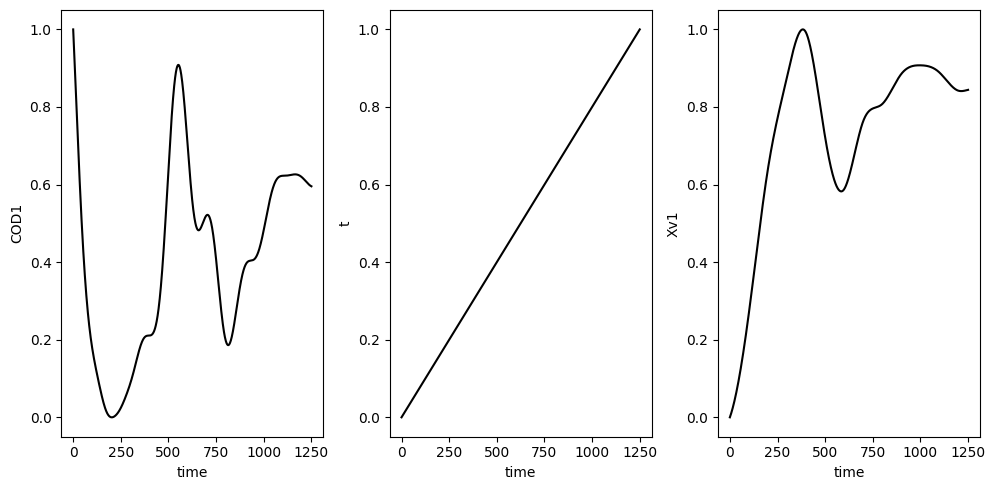

In [5]:
pltf.plot_subdivided_plane_with_data(pd.DataFrame(data,columns=["COD1","t","Xv1"]),  color="black", x_labels=["time"]*3, titles=[None]*3)

### Dataset 2

In [6]:
import scipy.io
mat = scipy.io.loadmat('../data/datosIA.mat')

dataIA = np.column_stack([mat["X"], mat["OD"], mat["S"]])
dataIA = dm.normalize_min_max(dataIA)

# X = [X, OD], Y = [S]
trainIA, _, validIA, idx = dm.train_test_val(dataIA, (80,0,20))


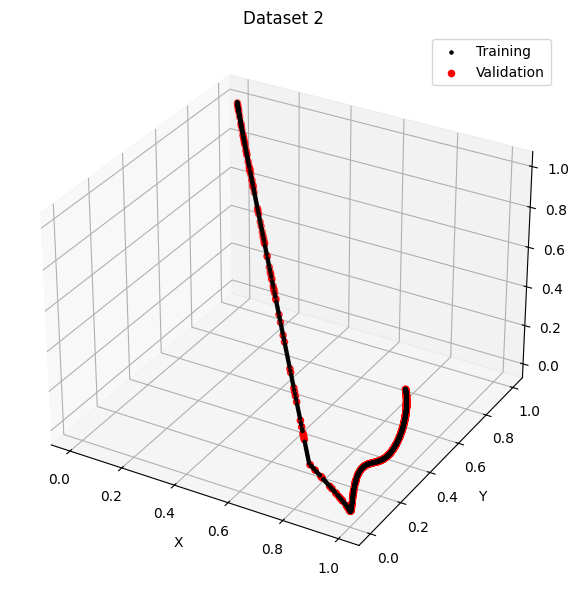

In [7]:
pltf.plot_3d(trainIA, validIA, label=['Training', 'Validation'], marker=['.', 'o'], color=['black', 'red'], title="Dataset 2")

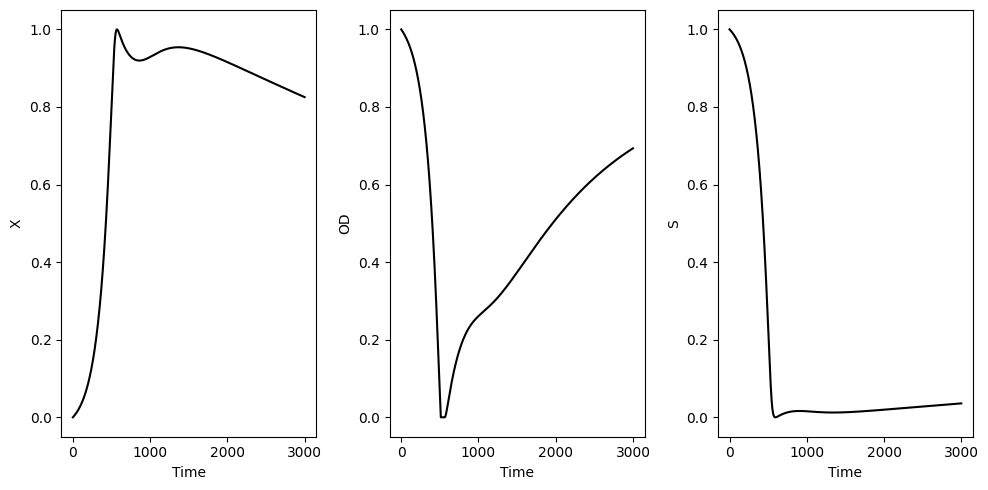

In [8]:
pltf.plot_subdivided_plane_with_data(pd.DataFrame(dataIA,columns=["X","OD","S"]),  color="black", x_labels=["Time"]*3, titles=[None]*3)

# Autoencoder

### Self Programmed Autoencoder

In [62]:
n_neurons = [7]
n_activation = [linear(1.2), linear(0.5), sigmoid(1.2)]

NN_bias = MLP.Perceptron(3,n_neurons, 3, n_activation,0.01)
grad, _, _, _, _ = NN_bias.train(train, train, 50)

y_pred = np.array([NN_bias.forward(x) for x in valid]).reshape(-1,3)
    

(751, 3) (751, 3) (250, 3) (250, 3)


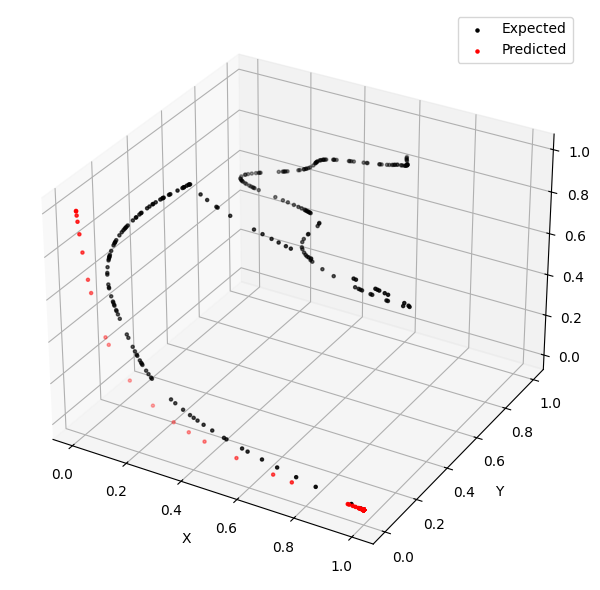

In [63]:
pltf.plot_3d(valid, y_pred, label=["Expected", "Predicted"], color=["black","red"])

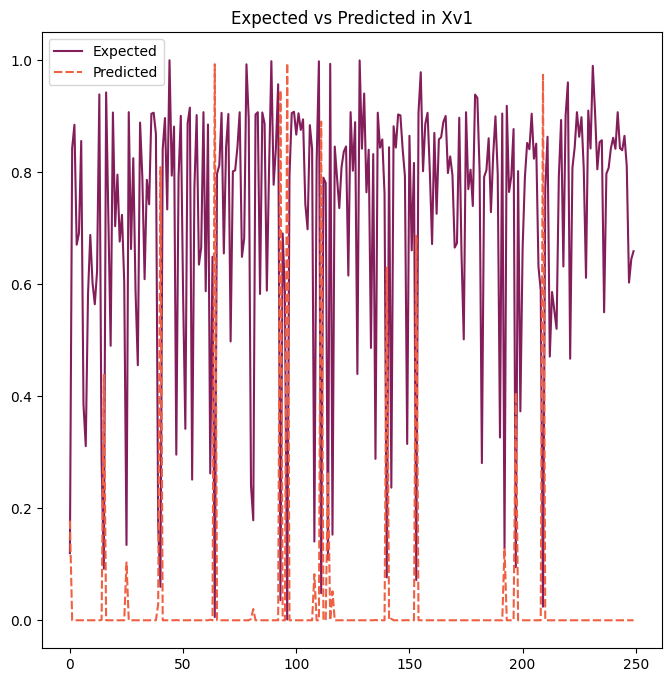

In [67]:
pltf.plot_multiple_graphs(pd.DataFrame({"Expected": valid[:,2], "Predicted": y_pred[:,2]}, columns=["Expected","Predicted"]), title="Expected vs Predicted in Xv1", palette="rocket", dashes = True, figsize=(8,8))

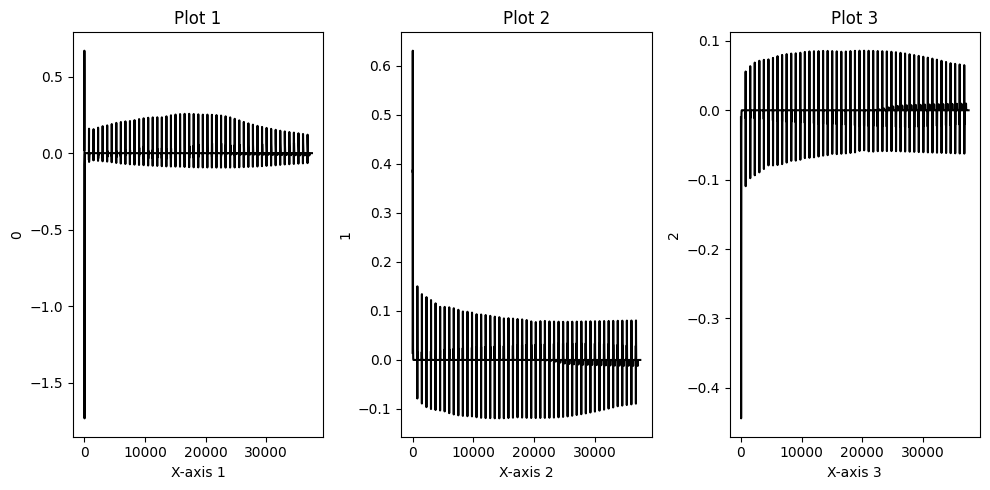

In [68]:
pltf.plot_subdivided_plane_with_data(pd.DataFrame(grad))

In [127]:
n_neurons = [7]
n_activation = [linear(1.2), linear(1), sigmoid(1)]

NN_bias = MLP.Perceptron(3,n_neurons, 3, n_activation,0.05)
grad, _, _, _, _ = NN_bias.train(trainIA, trainIA, 10)

y_predIA = np.array([NN_bias.forward(x) for x in validIA]).reshape(-1,3)

(1801, 3) (1801, 3) (600, 3) (600, 3)


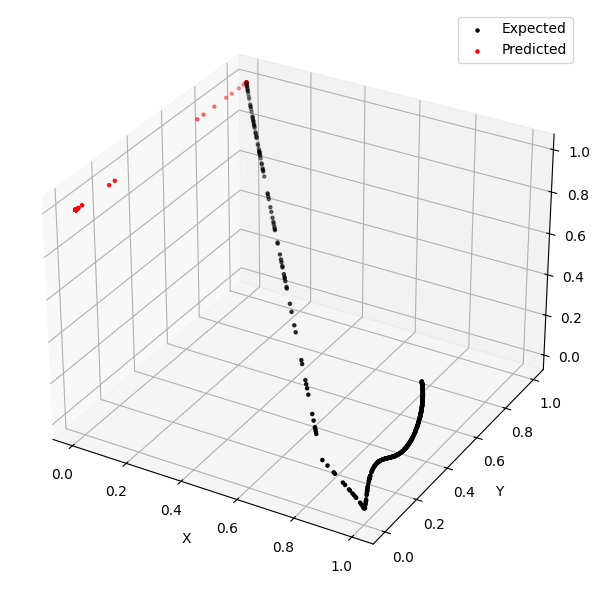

In [128]:
pltf.plot_3d(validIA, y_predIA, label=["Expected", "Predicted"], color=["black","red"])

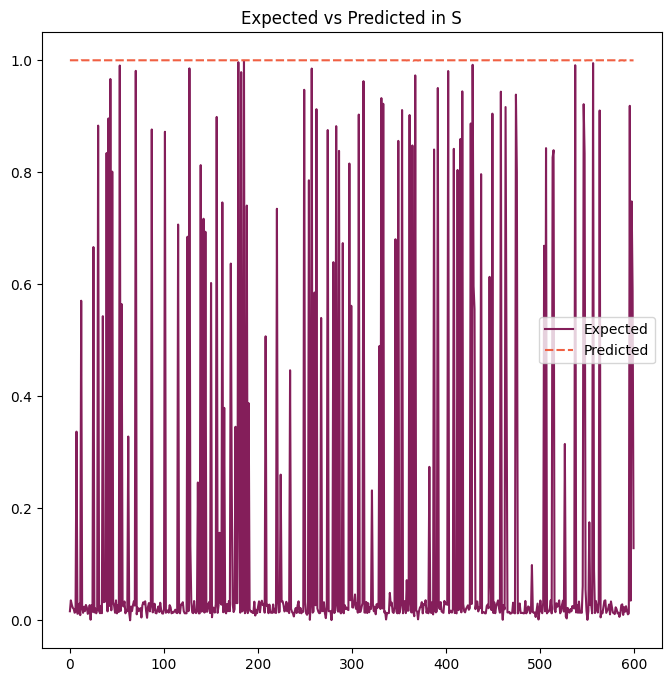

In [129]:
pltf.plot_multiple_graphs(pd.DataFrame({"Expected": validIA[:,2], "Predicted": y_predIA[:,2]}, columns=["Expected","Predicted"]), title="Expected vs Predicted in S", palette="rocket", dashes = True, figsize=(8,8))

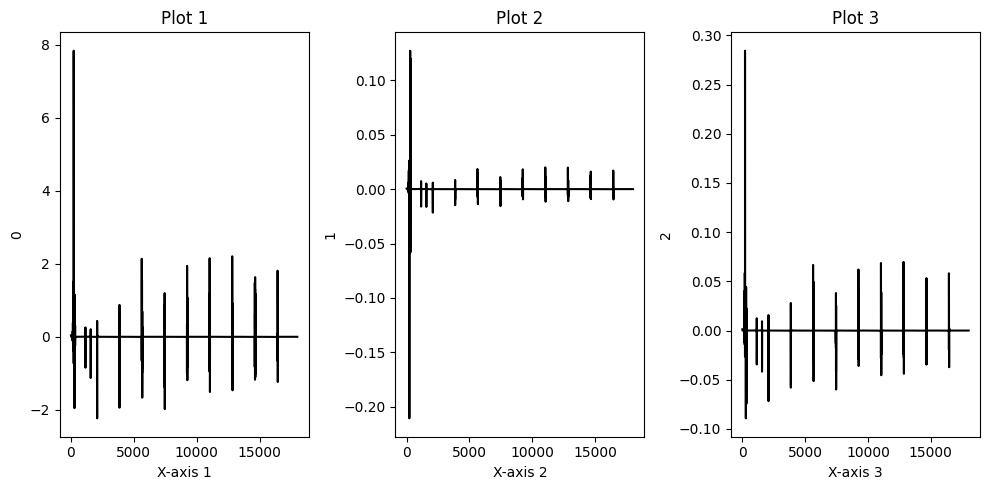

In [130]:
pltf.plot_subdivided_plane_with_data(pd.DataFrame(grad))

### Keras autoencoder

In [15]:
import keras

class Autoencoder(keras.Model):
    def __init__(self, input_shape=(3,)):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = keras.Sequential([
            keras.layers.Dense(16, activation='relu', input_shape=input_shape),
            keras.layers.Dense(8, activation='relu'),
        ])

        # Decoder
        self.decoder = keras.Sequential([
            keras.layers.Dense(8, activation='relu'),
            keras.layers.Dense(16, activation='relu'),
            keras.layers.Dense(3, activation='linear'),
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

2023-09-28 17:24:04.787576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 17:24:05.018926: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 17:24:05.021159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 17:24:05.888232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
# Create the autoencoder
autoencoder = Autoencoder()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train, train, epochs=100)
Train_out = autoencoder.predict(train)

# Evaluate the autoencoder
loss= autoencoder.evaluate(valid, valid)
print('Loss:', loss)

Test_out = autoencoder.predict(valid)
#print('Accuracy:', accuracy)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.3480
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1131
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0301
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 13/100
32/32 [=================

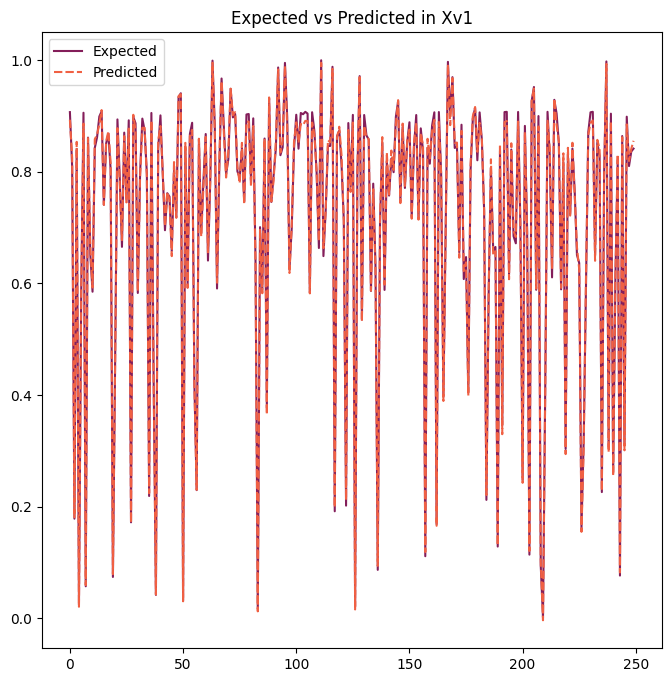

In [17]:
pltf.plot_multiple_graphs(pd.DataFrame({"Expected": valid[:,2], "Predicted": Test_out[:,2]}, columns=["Expected","Predicted"]), title="Expected vs Predicted in Xv1", palette="rocket", dashes = True, figsize=(8,8))

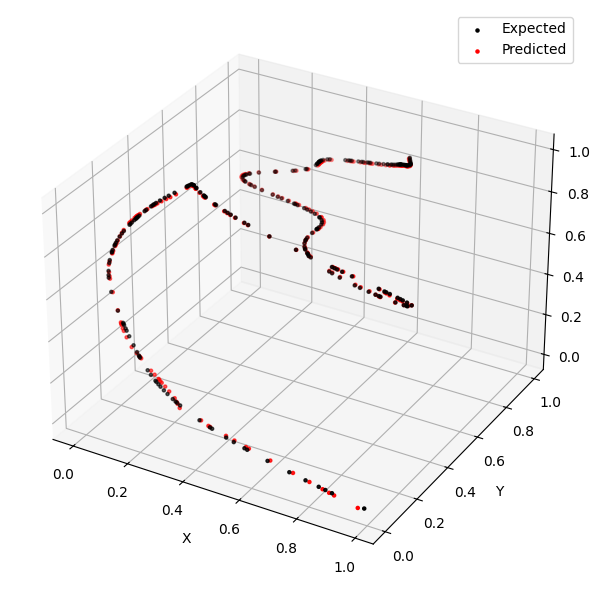

In [18]:
pltf.plot_3d(valid, Test_out, label=["Expected", "Predicted"], color=["black","red"])

In [36]:
# Create the autoencoder
autoencoder = Autoencoder()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(trainIA, trainIA, epochs=100)
Train_out = autoencoder.predict(trainIA)

# Evaluate the autoencoder
loss= autoencoder.evaluate(validIA, validIA)
print('Loss:', loss)

Test_outIA = autoencoder.predict(validIA)
#print('Accuracy:', accuracy)

Epoch 1/100
76/76 [==============================] - 1s 2ms/step - loss: 0.2795
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 7.2063e-04
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 4.2385e-04
Epoch 8/100
76/76 [==============================] - 0s 2ms/step - loss: 2.5136e-04
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 1.5043e-04
Epoch 10/100
76/76 [==============================] - 0s 2ms/step - loss: 9.7228e-05
Epoch 11/100
76/76 [==============================] - 0s 2ms/step - loss: 6.9651e-05
Epoch 12/100
76/76 [==============================] - 0s 2ms/step - loss: 5.3920e-05
Epoch 13/

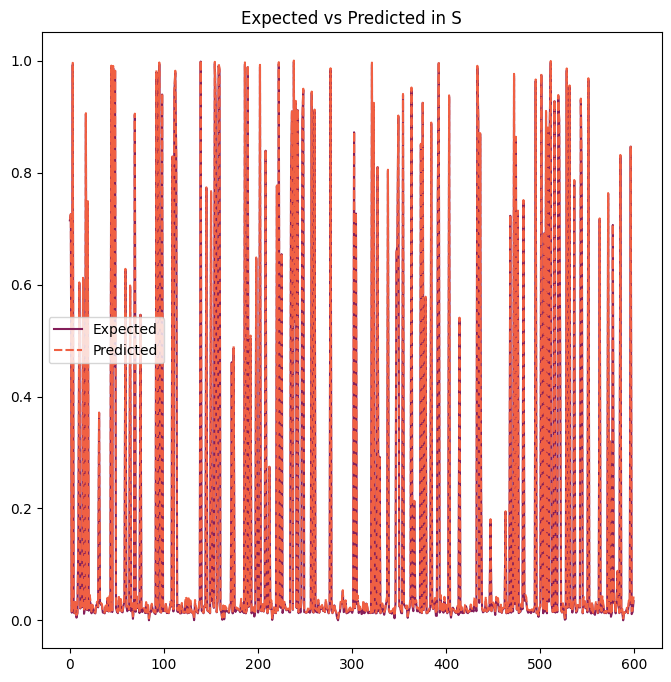

In [39]:

pltf.plot_multiple_graphs(pd.DataFrame({"Expected": validIA[:,2], "Predicted": Test_outIA[:,2]}, columns=["Expected","Predicted"]), title="Expected vs Predicted in S", palette="rocket", dashes = True, figsize=(8,8))

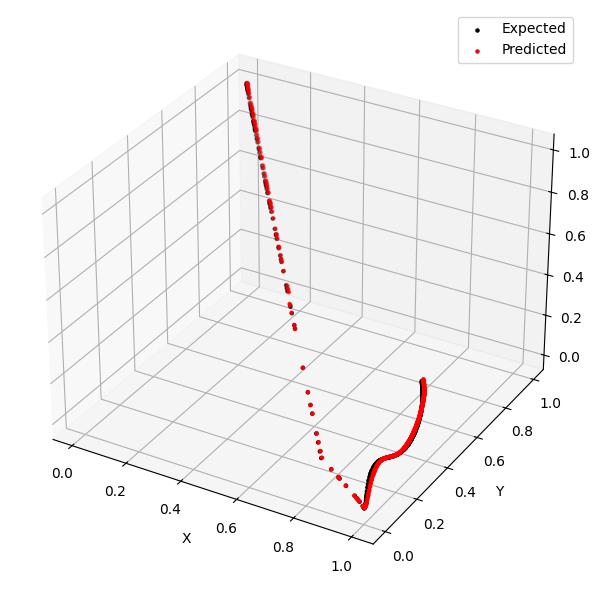

In [38]:
pltf.plot_3d(validIA, Test_outIA, label=["Expected", "Predicted"], color=["black","red"])

# Preguntar profe por esto

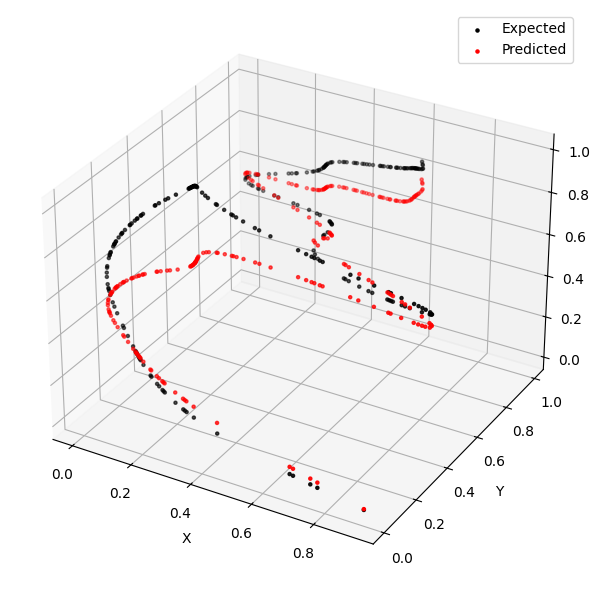

In [ ]:
pltf.plot_3d(valid, np.hstack((valid[:,0].reshape(-1,1),valid[:,1].reshape(-1,1),-y_pred)), label=["Expected", "Predicted"], color=["black","red"])

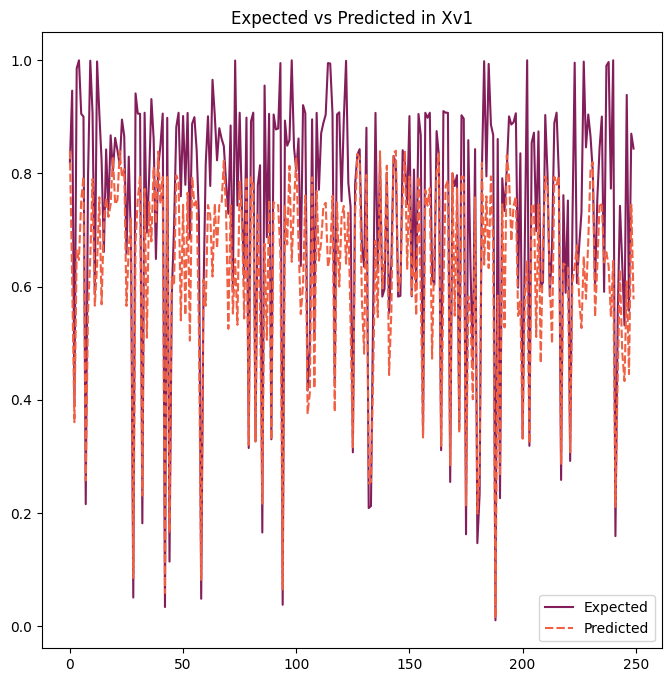

In [ ]:
pltf.plot_multiple_graphs(pd.DataFrame({"Expected": valid[:,-1], "Predicted": -y_pred.reshape(-1)}, columns=["Expected","Predicted"]), title="Expected vs Predicted in Xv1", palette="rocket", dashes = True, figsize=(8,8))